Tutorial for Machine Learning using Python (Pandas and Scikit-Learn)
====================================================================

### [파이썬](https://ko.wikipedia.org/wiki/%ED%8C%8C%EC%9D%B4%EC%8D%AC) (파이선? 파이쏜?)

[파이썬](https://www.python.org/) (Python)은 1991년 프로그래머인 [귀도 반 로섬(Guido van Rossum)](https://www.google.com/search?client=firefox-b-d&q=guido+van+rossum)이 발표한 [고급 프로그래밍 언어](https://ko.wikipedia.org/wiki/%EA%B3%A0%EA%B8%89_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D_%EC%96%B8%EC%96%B4)로 플랫폼 독립적이며 인터프리터식, 객체지향적, [동적 타이핑(dynamically typed](https://stackoverflow.com/questions/1517582/what-is-the-difference-between-statically-typed-and-dynamically-typed-languages)) 대화형 언어이다. 파이썬이라는 이름은 귀도가 좋아하는 코미디 [<Monty Python's Flying Circus>](https://www.google.com/search?client=firefox-b-d&q=Monty+Python%27s+Flying+Circus)에서 따온 것이다.

[Hey Guido~ !](https://www.google.com/search?q=guido+cars+movie&client=firefox-b-d&source=lnms&tbm=isch&sa=X&ved=0ahUKEwj24_OGv-_hAhUDUrwKHWnLCVMQ_AUIDigB&biw=1527&bih=1103)


------------------------------------------------------------------------------------------------------------------------------------

## Library Import 

#### 파이선 사용을 위해서는 사용할 라이브러리를 불러오는 것을 먼저 실행해야 합니다. 
  * numpy 
    + object for matrix, verctor and its operations 
  * pandas
    + data manipulation, especially, csv (excel ...)
  * matplotlib
    + visualization (2D plot)
  * scikit-learn
    + main algorithms for machine learning 

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 이것도 한 번 해보세요
# import this

-----------------------------------------------------------------------------------------------

## Reading Data

#### 오늘 실습할 데이터를 땡겨(?)옵니다. (google cloud computing 환경을 실습하고 있기 때문에 파일을 어디서엔가 가져와야 합니다.) 

In [3]:
# !wget https://raw.github.com/jeonkiwan/PythonTutorial/master/Tutorial01/wdbc.csv -O wdbc.csv

- - -

### Data Description

Title: Wisconsin Diagnostic Breast Cancer (WDBC)


* Number of instances: 569 

* Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

* Attribute information

    + ID number
    + __Diagnosis (M = malignant, B = benign)__


* Ten real-valued features are computed for each cell nucleus:

    + radius (mean of distances from center to points on the perimeter)
    + texture (standard deviation of gray-scale values)
    + perimeter
    + area
    + smoothness (local variation in radius lengths)
    + compactness (perimeter^2 / area - 1.0)
    + concavity (severity of concave portions of the contour)
    + concave points (number of concave portions of the contour)
    + symmetry 
    + fractal dimension ("coastline approximation" - 1)


* The __mean__, __standard error__, and __"worst" or largest__ (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

* All feature values are recoded with four significant digits.

* Missing attribute values: none

* __Class distribution: 357 benign, 212 malignant__

--------------------------------------------

## Pandas

#### 파일을 pandas library로 불러서, 컴퓨터에서 쓸 수 있는 [데이터프레임(DataFrame)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)으로 만듭니다. (그렇다고 합니다. :))

In [4]:
wdbc = pd.read_csv('./wdbc.csv')

# first 5 rows
print(len(wdbc))
wdbc.head()

# full 
# print(wdbc)

569


,id,diagnosis,radius_m,radius_s,radius_w,texture_m,texture_s,texture_w,perimeter_m,perimeter_s,...,concavity_w,concave points_m,concave points_s,concave points_w,symmetry_m,symmetry_s,symmetry_w,fractal dimension_m,fractal dimension_s,fractal dimension_w
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
wdbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                     569 non-null int64
diagnosis              569 non-null object
radius_m               569 non-null float64
radius_s               569 non-null float64
radius_w               569 non-null float64
texture_m              569 non-null float64
texture_s              569 non-null float64
texture_w              569 non-null float64
perimeter_m            569 non-null float64
perimeter_s            569 non-null float64
perimeter_w            569 non-null float64
area_m                 569 non-null float64
area_s                 569 non-null float64
area_w                 569 non-null float64
smoothness_m           569 non-null float64
smoothness_s           569 non-null float64
smoothness_w           569 non-null float64
compactness_m          569 non-null float64
compactness_s          569 non-null float64
compactness_w          569 non-null float64
concavity_m       

---------------------

## Convert DataFrame as Numpy Array

In [6]:
data_column = wdbc.columns[2:]
X = wdbc[data_column].values

In [7]:
Y = pd.Categorical(wdbc.diagnosis).codes

---------------------------------

## Scikit-learn : Data Splitting

#### Scikit-learn의 내장함수인 train_test_split을 이용하여 train set와 test set을 분리해 봅시다.

```python
def train_test_split(*arrays, **options):
    """
    Split arrays or matrices into random train and test subsets
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    Read more in the :ref:`User Guide <cross_validation>`.
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    test_size : float, int or None, optional (default=0.25)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. By default, the value is set to 0.25.
        The default will change in version 0.21. It will remain 0.25 only
        if ``train_size`` is unspecified, otherwise it will complement
        the specified ``train_size``.
    train_size : float, int, or None, (default=None)
        If float, should be between 0.0 and 1.0 and represent the
        proportion of the dataset to include in the train split. If
        int, represents the absolute number of train samples. If None,
        the value is automatically set to the complement of the test size.
    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.
    shuffle : boolean, optional (default=True)
        Whether or not to shuffle the data before splitting. If shuffle=False
        then stratify must be None.
    stratify : array-like or None (default=None)
        If not None, data is split in a stratified fashion, using this as
        the class labels.
    Returns
    -------
    splitting : list, length=2 * len(arrays)
        List containing train-test split of inputs.
        .. versionadded:: 0.16
            If the input is sparse, the output will be a
            ``scipy.sparse.csr_matrix``. Else, output type is the same as the
            input type.
    """

```

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, 
                                                    test_size=0.3,
#                                                    train_size=0.75,
                                                    random_state=12345)

In [10]:
print('train data ratio: ', len(train_X)/len(X))

print('All:', np.bincount(Y) / float(len(Y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

train data ratio:  0.6994727592267135
All: [62.74165202 37.25834798]
Training: [61.80904523 38.19095477]
Test: [64.9122807 35.0877193]


## Data Balencing Issue

In [11]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, 
                                                    test_size=0.3,
                                                    random_state=12345,
                                                    stratify=Y)

In [12]:
print('All:', np.bincount(Y) / float(len(Y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

All: [62.74165202 37.25834798]
Training: [62.81407035 37.18592965]
Test: [62.57309942 37.42690058]


---------------------
## Let's Get It 


#### [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [13]:
from sklearn.linear_model import LogisticRegression

#### Load algorithm (create classifier)

In [14]:
classifier_lr = LogisticRegression() # class instance 

#### Fit!

In [15]:
classifier_lr.fit(train_X, train_y)

/opt/local/anaconda/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Prediction

In [16]:
prediction_lr = classifier_lr.predict(test_X)

#### Evaluation

In [17]:
print(prediction_lr)
print(test_y)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1
 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1]
[0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0
 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1
 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1
 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1]


In [18]:
print("Fraction Correct [Accuracy]: ", np.sum(prediction_lr == test_y) / float(len(test_y)))

Fraction Correct [Accuracy]:  0.9122807017543859


In [19]:
print('Samples incorrectly classified: ', np.where(prediction_lr != test_y)[0])

Samples incorrectly classified:  [  9  10  11  17  28  30  47  56  90  94  95 103 138 153 163]


----------------------------
#### [K Neighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) 

In [20]:
# call module (method)
from sklearn.neighbors import KNeighborsClassifier

# create classifier (class) instance 
classifier_kn = KNeighborsClassifier().fit(train_X, train_y)

# compute accuracy 
print("Fraction Correct [Accuracy]: ", classifier_kn.score(test_X, test_y))
# or 
# print("Fraction Correct [Accuracy]: ", np.sum(classifier_kn.predict(test_X) == test_y) / float(len(test_y)))

print('Samples incorrectly classified: ', np.where(classifier_kn.predict(test_X) != test_y)[0])

Fraction Correct [Accuracy]:  0.9298245614035088
Samples incorrectly classified:  [  9  10  11  30  47  56  73  82 146 147 153 163]


---------------------------
## Show me the Graph (not money!!)

#### Define an useful function

In [21]:
plt.rcParams['figure.figsize'] = [12, 8]

# function definition ...
def plot_embedding(X, Y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    fig, ax = plt.subplots()
    for i in range(X.shape[0]):
        if X.shape[1] > 1:
            plt.text(X[i, 0], X[i, 1], 'M' if Y[i] > 0 else 'B', color=plt.cm.tab10(Y[i]), fontdict={'weight': 'bold', 'size': 9})
        else:
            plt.text(X[i, 0], 0.5, 'M' if Y[i] > 0 else 'B', color=plt.cm.tab10(1-Y[i]), fontdict={'weight': 'bold', 'size': 9})
        
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


#### [Principal Component Analysis, PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

<Figure size 864x576 with 0 Axes>

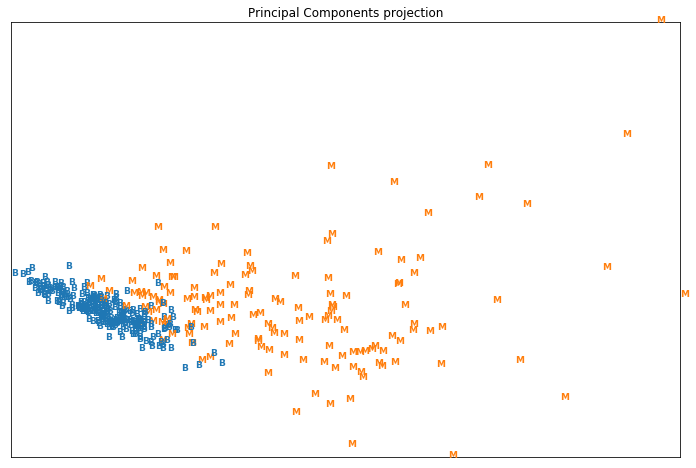

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(train_X)
# print(pca.singular_values_)  
# print(pca.explained_variance_ratio_)  
# print(pca.components_)

X_pca = pca.transform(train_X)
plot_embedding(X_pca, train_y, "Principal Components projection")


----------------------------------
## Pump up the accuracy !!

#### data normalization

In [23]:
# cf. full data scaling ...
# scaled_X = (wdbc[data_column] - wdbc[data_column].mean())/wdbc[data_column].std()
# train_X, test_X, train_y, test_y = train_test_split(scaled_X, Y, 
#                                                     train_size=0.75,
#                                                     test_size=0.25,
#                                                     random_state=1234,
#                                                     stratify=Y)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
scaled_train_X = scaler.transform(train_X)
scaled_test_X = scaler.transform(test_X)

# check
# print(np.mean(scaled_train_X,axis=0), np.std(scaled_train_X,axis=0))
# print(np.mean(scaled_test_X,axis=0), np.std(scaled_test_X,axis=0))

In [26]:
classifier_skn = KNeighborsClassifier().fit(scaled_train_X, train_y)

print("Fraction Correct [Accuracy]: ", classifier_skn.score(scaled_test_X, test_y))
print('Samples incorrectly classified: ', np.where(classifier_skn.predict(scaled_test_X) != test_y)[0])

Fraction Correct [Accuracy]:  0.9590643274853801
Samples incorrectly classified:  [ 10  24  28  34 138 153 163]


<Figure size 864x576 with 0 Axes>

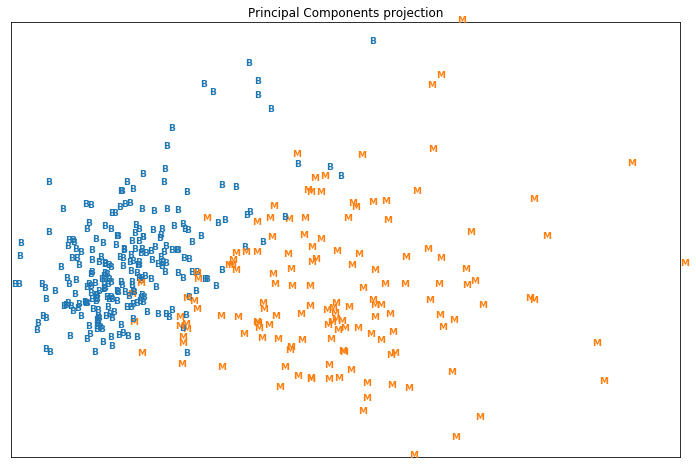

In [27]:
pca = PCA(n_components=2).fit(scaled_train_X)
# print(pca.singular_values_)  
# print(pca.explained_variance_ratio_)  
# print(pca.components_)

X_pca = pca.transform(scaled_train_X)
plot_embedding(X_pca, train_y, "Principal Components projection")


In [28]:
# linear classifier with scaled data
classifier_lr = LogisticRegression()
classifier_lr.fit(scaled_train_X, train_y)

print("Fraction Correct [Accuracy]: ", classifier_lr.score(scaled_test_X, test_y))
print('Samples incorrectly classified: ', np.where(classifier_lr.predict(scaled_test_X) != test_y)[0])


Fraction Correct [Accuracy]:  0.9707602339181286
Samples incorrectly classified:  [  9  10  17  95 116]


/opt/local/anaconda/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


----------------------------------
#### [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [29]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [30]:
# algorithm
classifier_dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=None)
# fit!
classifier_dt.fit(scaled_train_X, train_y)

score = cross_val_score(classifier_dt, scaled_train_X, train_y, cv=5)
print(' mean:', score.mean(), ' std:', score.std())

 mean: 0.9143987341772153  std: 0.03541222666181687


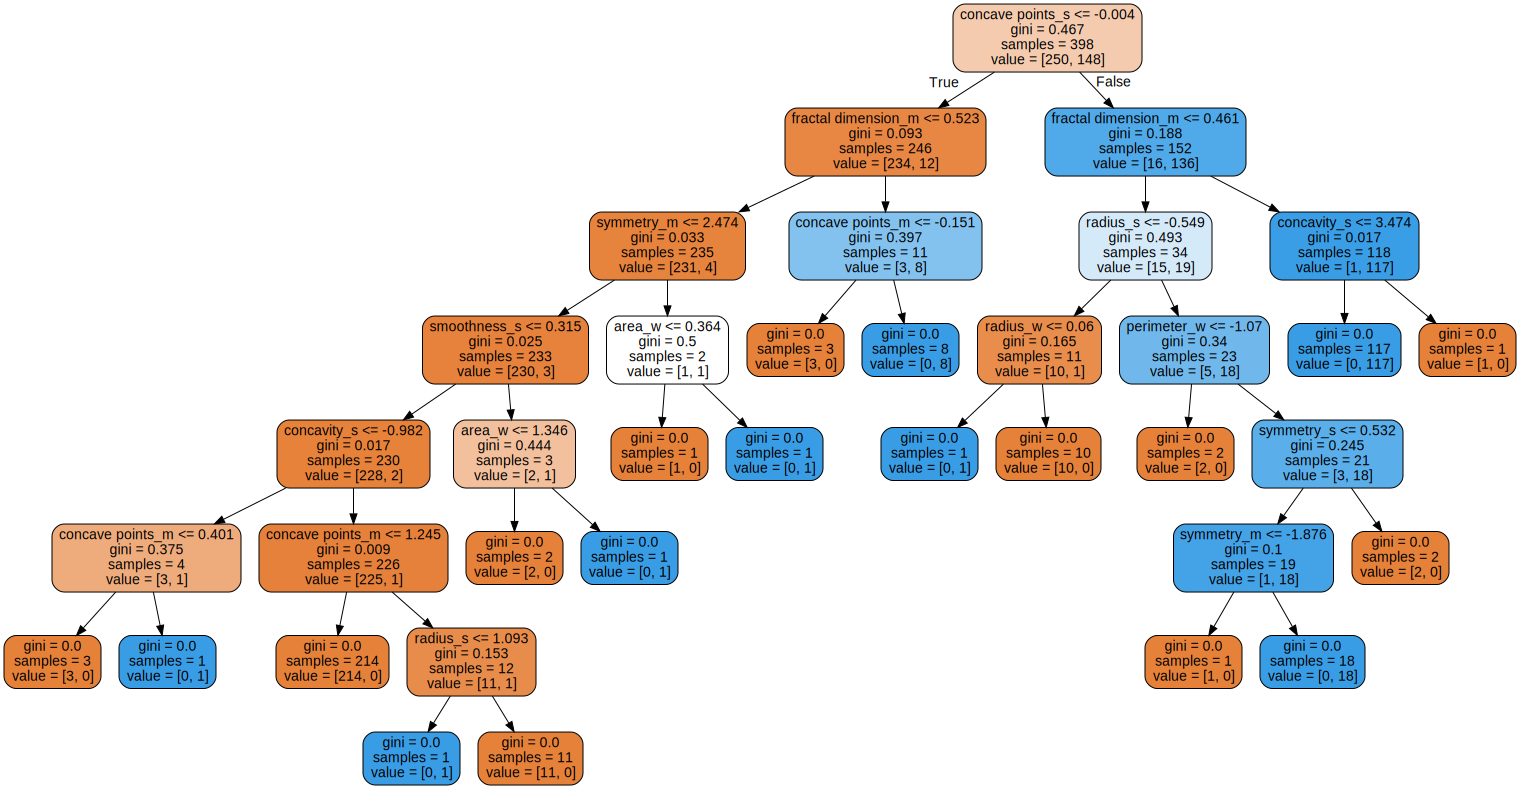

In [31]:
# tree graph
import graphviz 
#
dtc_data = tree.export_graphviz(classifier_dt, out_file=None, filled=True, rounded=True,
                                feature_names=data_column,
                                special_characters=False) 
graph = graphviz.Source(dtc_data) 
graph

# file export ...
# graph.render("wisconsin diagnostic breast cancer") 

In [32]:
print("Fraction Correct [Accuracy]: ", classifier_dt.score(scaled_test_X, test_y))
print('Samples incorrectly classified: ', np.where(classifier_dt.predict(scaled_test_X) != test_y)[0])


Fraction Correct [Accuracy]:  0.9239766081871345
Samples incorrectly classified:  [  7  17  20  34  47  50  90  94 106 124 126 128 129]


-------------------------------------------------------------
## [Ensemble Methods](https://scikit-learn.org/stable/modules/ensemble.html) 


-------------------------------------------------------------
#### [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
# algorithm
classifier_rf = RandomForestClassifier(n_estimators=64)
# fit!
classifier_rf.fit(scaled_train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=64, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
score = cross_val_score(classifier_rf, scaled_train_X, train_y, cv=10)
print(' mean:', score.mean(), ' std:', score.std())

 mean: 0.9496153846153847  std: 0.03743414116006732


In [36]:
importances = classifier_rf.feature_importances_
# importances_std = np.std([tr.feature_importances_ for tr in classifier_rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

# for i in range(len(data_column)):
for idx in indices:
    print("{:24s}  {:.4f} ".format(data_column[idx], importances[idx]))

Feature ranking:
fractal dimension_m       0.1919 
concave points_w          0.1252 
perimeter_s               0.1136 
concave points_s          0.1082 
smoothness_s              0.0723 
perimeter_m               0.0699 
concavity_w               0.0586 
radius_w                  0.0532 
symmetry_w                0.0313 
radius_m                  0.0247 
texture_w                 0.0181 
texture_m                 0.0170 
concave points_m          0.0130 
symmetry_m                0.0110 
radius_s                  0.0088 
area_s                    0.0076 
concavity_s               0.0076 
symmetry_s                0.0074 
fractal dimension_s       0.0074 
compactness_s             0.0070 
perimeter_w               0.0063 
smoothness_w              0.0060 
texture_s                 0.0051 
fractal dimension_w       0.0046 
area_w                    0.0044 
smoothness_m              0.0044 
compactness_w             0.0041 
concavity_m               0.0039 
area_m                    0.003

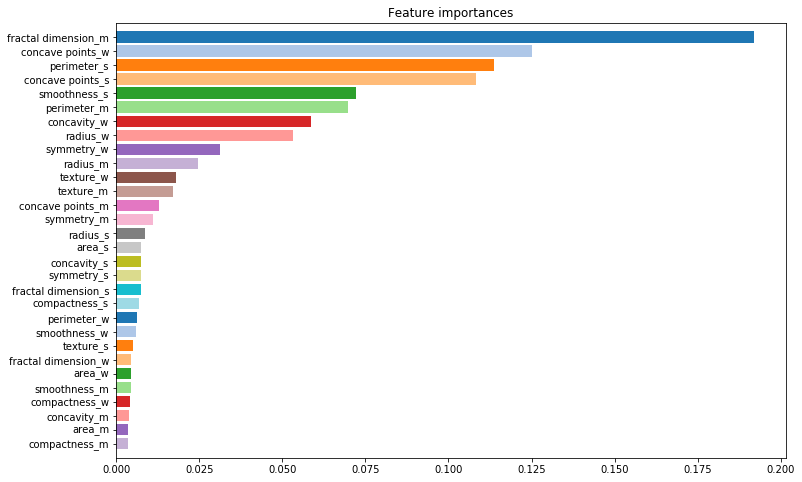

In [37]:
colors = [plt.cm.tab20(k%20) for k in range(len(data_column))]

# cf.
# colors = [] # or colors = list()
# for k in range(len(data_column)):
#     colors.append(plt.cm.tab20(k%20))


fig, ax = plt.subplots()
ax.set_title("Feature importances")
ax.barh(range(len(data_column)), importances[indices], color=colors, align="center")
ax.set_yticks(range(len(data_column)))
ax.set_yticklabels(data_column[indices])
ax.set_ylim([-1, len(data_column)])
ax.invert_yaxis()